# Pandas

### Pandas处理以下两个数据结构 

- 系列(Series)
- 数据帧(DataFrame)



In [ ]:
*考虑这些数据结构的最好方法是，【较高维数据结构是其较低维数据结构的容器】
- 例如，DataFrame是Series的容器，

- 数据       结构       维数描述

- -系列        1        1D标记均匀数组，大小不变。
- -数据帧       2        一般2D标记，大小可变的表结构与潜在的异质类型的列。


#### 1.系列(Series)

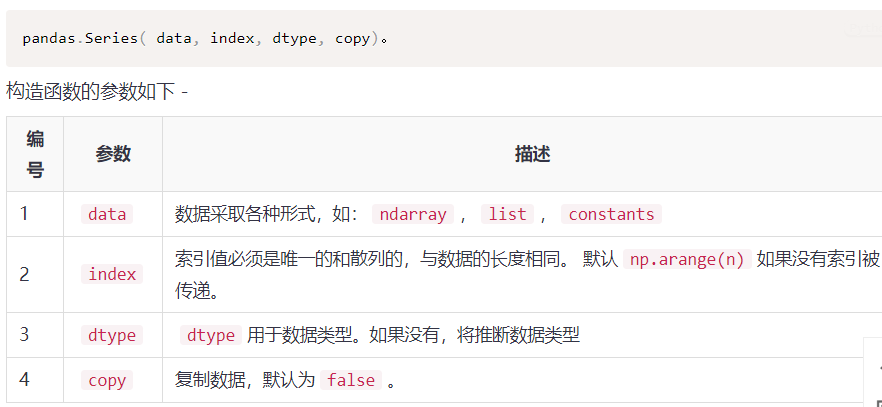

In [19]:
                            #Series
#     它由一组数据(各种NumPy数据类型)以及一组与之相
#     关的数据标签(即索引)组成。

import pandas as pd
se = pd.Series([4,7,-5,3],index=(1,2,3,4))
print(se)
print("--------------------------------------------------")
print(se.values, se.index)    #获取 系列 的值（索引）


1    4
2    7
3   -5
4    3
dtype: int64
--------------------------------------------------
[ 4  7 -5  3] Int64Index([1, 2, 3, 4], dtype='int64')


In [24]:
# 从ndarray创建一个系列

import pandas as pd
import numpy as np
data = np.array(['a','b','c','d'])
s = pd.Series(data)
print(s)

0    a
1    b
2    c
3    d
dtype: object


In [84]:
# 从字典创建一个系列

import pandas as pd
sdata={'a':100,'b':200,'c':300,'d':400}
obj2=pd.Series(sdata)
states = ['ee', 'a', 'c', 'b']
obj3=pd.Series(sdata,index=states)
print(obj2,'\n\n',obj3,'\n\n',obj3+obj2)

a    100
b    200
c    300
d    400
dtype: int64 

 ee      NaN
a     100.0
c     300.0
b     200.0
dtype: float64 

 a     200.0
b     400.0
c     600.0
d       NaN
ee      NaN
dtype: float64


In [37]:
# 从标量创建一个系列

import pandas as pd
import numpy as np
s = pd.Series(5, index=[0, 1, 2, 3])
print(s)

0    5
1    5
2    5
3    5
dtype: int64


In [47]:
# 从具有位置的系列中访问数据      (系列中的数据可以使用类似于访问ndarray中的数据来访问)
import pandas as pd
s = pd.Series([1,2,3,4,5],index = ['a','b','c','d','e'])
print(s)       #取全部
#print(s[:])   # 同上
print(s[1:2])  # 取索引为1
print(s[-3:])  # 取倒数前三个
print('---------------------------------')
print(s['a'],'\n')  # 利用标签 取
print(s[['a','c']])

a    1
b    2
c    3
d    4
e    5
dtype: int64
b    2
dtype: int64
c    3
d    4
e    5
dtype: int64
---------------------------------
1 

a    1
c    3
dtype: int64


#### 2.数据帧(DataFrame)

数据帧(DataFrame)的功能特点：

- 潜在的列是不同的类型
- 大小可变
- 标记轴(行和列)
- 可以对行和列执行算术运算

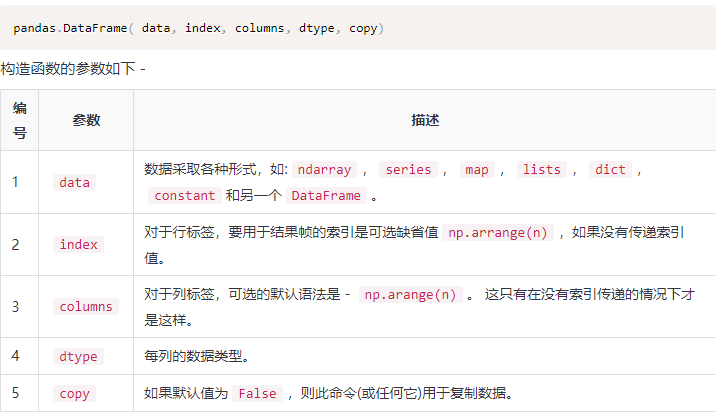

In [53]:
#                             DataFrame
# DataFrame是一个表格型的数据结构，它含有一组有序的列，每列可
# 以是不同的值类型(数值、字符窜、布尔值)。

# 从列表创建 DataFrame

import pandas as pd
data = [['Alex',10],['Bob',12],['Clarke',13]]
df = pd.DataFrame(data,columns=['Name','Age'])
print(df)

     Name  Age
0    Alex   10
1     Bob   12
2  Clarke   13


In [118]:
# 从字典创建 DataFrame

import pandas as pd
data={'province':['Zhejiang','Anhui','Shanghai','Beijing','Guangdong'],\
      'year':[2011,2012,2013,2014,2015],\
      'pop':[1.5,1.7,3.6,2.4,2.9]
     }
frame1=pd.DataFrame(data)
print(frame1)

    province  year  pop
0   Zhejiang  2011  1.5
1      Anhui  2012  1.7
2   Shanghai  2013  3.6
3    Beijing  2014  2.4
4  Guangdong  2015  2.9


In [117]:
# 表的扩充， 利用 标签loc 或 行号iloc 选择

import numpy as np
frame2=pd.DataFrame(data,columns=['year','province','pop','debt'],    \
                    index=['one','two','three','four','five'])
frame2['debt']=np.arange(5)
print(frame2)
print('\n-------------------------------------')# （行，列）
print(frame2.loc['one':'three',['year','pop']])          # 利用标签
print('\n-------------------------------------')# ：表示一个范围  [ ，，]表示只选择这几个
print(frame2.iloc[0:2,1:3])                              # 利用行号

       year   province  pop  debt
one    2011   Zhejiang  1.5     0
two    2012      Anhui  1.7     1
three  2013   Shanghai  3.6     2
four   2014    Beijing  2.4     3
five   2015  Guangdong  2.9     4

-------------------------------------
       year  pop
one    2011  1.5
two    2012  1.7
three  2013  3.6

-------------------------------------
     province  pop
one  Zhejiang  1.5
two     Anhui  1.7


In [85]:
# 更新行索引reindex，此时可引入缺失值fill_value

ser=Series([4.5,7.2,-5.3,3.6], index=['d','b','a','c'])
ser1=ser.reindex(['a','b','c','d','e'],fill_value=0)  #如果某个索引值当前不
                                                      #存在，就引入缺失值:
print(ser1)

a   -5.3
b    7.2
c    3.6
d    4.5
e    0.0
dtype: float64


In [91]:
# 附加行append

import pandas as pd
df = pd.DataFrame([[1, 2], [3, 4]], columns = ['a','b'])
df2 = pd.DataFrame([[5, 6], [7, 8]], columns = ['a','b'])

df = df.append(df2)
print(df)

   a  b
0  1  2
1  3  4
0  5  6
1  7  8


In [96]:
# 删除行 列

import pandas as pd
import numpy as np
data=pd.DataFrame(np.arange(16).reshape((4,4)),
index=['Zhejiang','Anhui','Shanghai','Beijing'],
columns=['one','two','three','four'])
print(data)
data2=data.drop(['Shanghai','Anhui'])         #实际上删除的是,axis=0，即行          
print('\n',data2)
data3=data.drop(['one','four'],axis=1)        #删除指定轴,axis=1上的项，即列
print('\n',data3)

          one  two  three  four
Zhejiang    0    1      2     3
Anhui       4    5      6     7
Shanghai    8    9     10    11
Beijing    12   13     14    15

           one  two  three  four
Zhejiang    0    1      2     3
Beijing    12   13     14    15

           two  three
Zhejiang    1      2
Anhui       5      6
Shanghai    9     10
Beijing    13     14


#### 3.基本功能

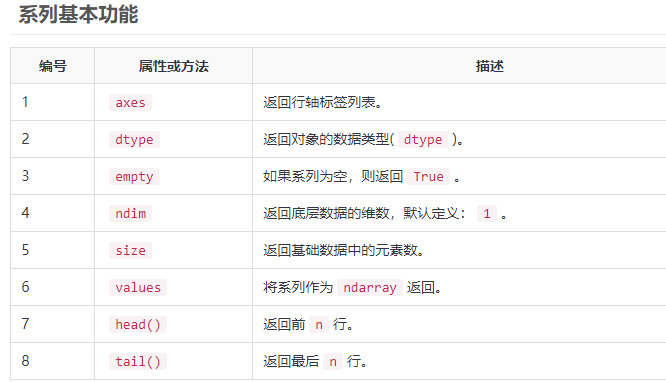

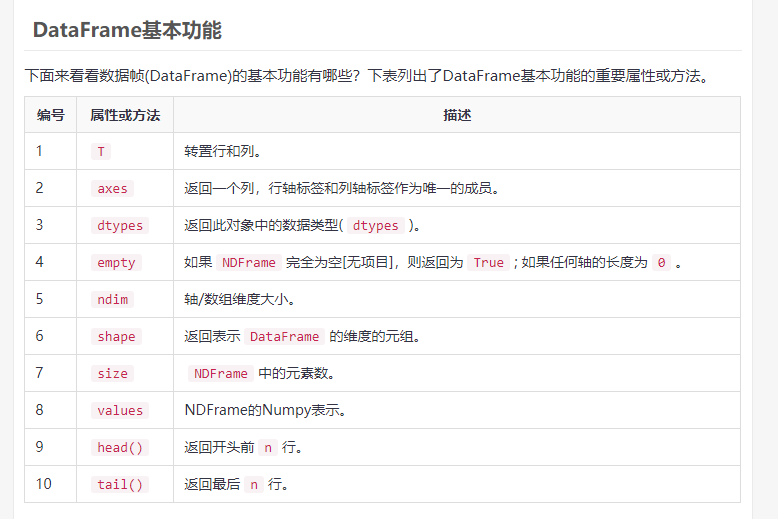

Pandas描述性统计

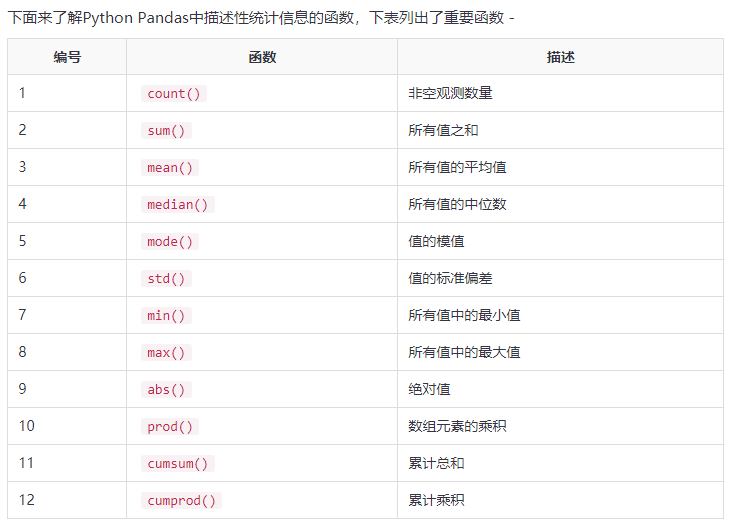